In [ ]:
# define the weight, given input vector q (quantity assoc to node i)

def weights(A, q, beta):
    n = len(A)
    w = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            w[i,j] = np.pow(q[i]*q[j], beta)*A[i,j]
    
    return w


In [ ]:
# test the weights function

weights(A1, q1, beta=2)

The most popular family of graph kernels is probably the random walk kernels which quantify the similarity between a pair of graphs based on the number of common walks in the two graphs.

The -step random walk kernel compares random walks up to length  in the two graphs. The most widely-used kernel from this family is the geometric random walk kernel [GartnerFW03] which compares walks up to infinity assigning a weight $\lambda^k, \lambda<1$ to walks of length  in order to ensure convergence of the corresponding geometric series. 


file:///Users/sian/Downloads/BloemReddy_columbia_0054D_13818.pdf

pg 46: random walk matrix: prob of reaching v_j after k steps is [W^k]_{ij}
 - how does the cycle basis fit into this theory ? 

In [ ]:
# take the kronecker product of the weight matrices


np.kron(w1, w2)

In [ ]:
# exact kernel is (q1 x q2 ) ( W_1^T x W_2^T)^{ell}(p1 x p2)

# number of length ell common walks on the direct product graph 
ell = 5

np.pow(np.kron(w1.T, w2.T), ell)
# idea: choose ell to optimize the score? How is this determined ?

In [ ]:
# test the output of the following
if self.p is not None:
    P = np.eye(XY.shape[0])
    S = self.mu_[0] * P
    for k in self.mu_[1:]:
        P = np.matmul(P, XY)
        S += k*P

In [ ]:
S = inv(np.identity(s) - self.lamda*XY).T


In [ ]:
# https://github.com/ysig/GraKeL/tree/master/grakel

def pairwise_operation(self, X, Y):
    
    XY = np.kron(X, Y)
    
    # p = number of steps 
    if self.p:
        S= np.pow(np.kron(w1.T, w2.T), ell)
    
    return np.sum(S)


In [ ]:
# test the above function 


In [80]:
# step 1 

import grakel
import networkx as nx
import numpy as np

from grakel import Graph
edges = {1: [2, 3], 2: [1], 3: [1]}
G = Graph(edges)

edges2 = {1:[2,3], 2:[1,3], 3:[1,2,4,5,6], 4:[3,5], 5:[3,4,6], 6:[3,5]}

G2 = Graph(edges2)




In [99]:
# step 1 b
edges3 = {1: [4,5], 2: [3,4], 3:[2,5], 4:[1,2], 5:[1,3]}
G3 = Graph(edges3)

In [100]:
# visualize network x 
nG1 = nx.Graph()
nG1.add_nodes_from([1,2,3])
nG1.add_edges_from([(1,2), (1,3)])

nG2 = nx.Graph()
nG2.add_nodes_from([1,2,3,4,5,6])
nG2.add_edges_from([(1,2), (1,3), (2,3), (3,4), (3,5), (3,6),(4,5),(5,6)])

nG3 = nx.Graph()
nG3.add_nodes_from([1,2,3,4,5])
nG3.add_edges_from([(1,4),(1,5), (2,3), (2,4),(3,5)])


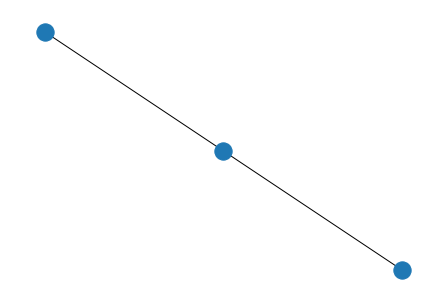

In [101]:
nx.draw(nG1)

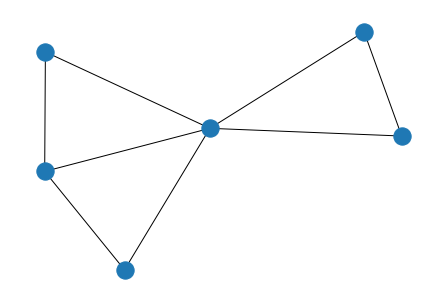

In [102]:
nx.draw(nG2)

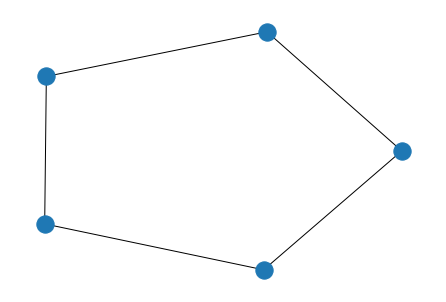

In [103]:
nx.draw(nG3)

{(1, 4): Text(0.6238046337340246, 0.5181112128961861, '{}'),
 (1, 5): Text(-0.2987449232904269, 0.7545654917061673, '{}'),
 (2, 3): Text(-0.20125507670957316, -0.7866164875209922, '{}'),
 (2, 4): Text(0.6848102401948171, -0.4328320763084378, '{}'),
 (3, 5): Text(-0.8086148739288417, -0.053228140772923094, '{}')}

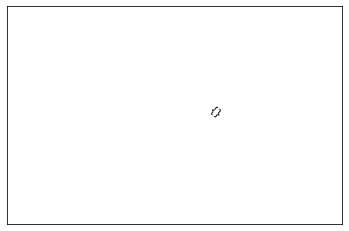

In [108]:
nx.draw_networkx_edge_labels(nG3, pos=nx.spring_layout(nG3))

In [81]:
# step 2 

edges_graph1 = {1:[2], 2:[1,3,4,5], 3:[2,4,6], 4:[2,3,5,6], 5:[2,4,6], 6:[3,4,5]}
edges_graph1_edge_diff= {1:[2,3], 2:[1,3,4,5], 3:[1,2,4,6], 4:[2,3,5,6], 5:[2,4,6], 6:[3,4,5]}

graph1 = Graph(edges_graph1)

graph1_copy = Graph(edges_graph1)

graph1_edge_diff = Graph(edges_graph1_edge_diff)

In [2]:
from grakel.kernels import RandomWalk

In [91]:
rw_kernel = RandomWalk(normalize=True)

In [92]:
rw_kernel.fit_transform([G])

array([[1.]])

In [93]:
rw_kernel.transform([G2])

array([[0.56625411]])

The above result suggests that the water molecule is more similar to hydronium than to itself. This is because the kernel values are not normalized. To apply normalization, we can set the corresponding attribute to True when initializing the graph kernel:

In [ ]:
# program the common nbd product 

def common_nbd_product(A, B, v_labels1, v_labels2):
    
    # vertices V(A) x V(B)
    n = len(A)
    
    vertices1x2 = {}
    inverse_vertices1x2= {}
    ind=0
    
    v1 = 0
    for lab1 in v_labels1:
        v2 = 0
        for lab2 in v_labels2:
            
            if lab1 == lab2:
                
                pair = (v1, v2)

                vertices1x2[ind] = pair
                inverse_vertices1x2[pair] = ind
            ind= ind+1
            v2 +=1
        v1+=1
    
    # make vertices as pairs of all v(A) x v(B)
    n1 = len(A)
    n2 = len(B)
    
    v3 = []
    
    list1 = np.range(n1)
    list2 = np.range(n2)
    # generate all unique pairs 
    for i in itertools.product(list1, list2):
        
        print(i)
        v3.append(i)
        
    
    for ver1 in v3:
        
        for ver2 in v3:
        
            a1 = ver1[0]
            a2 = ver1[1]
            
            b1 = ver2[0]
            b2 = ver2[1]
            # check the edges here
            e1 = np.nonzero(A[a1]) #np.where(A[i1] != 0 )

            e2 = np.nonzero(B[a2]) #np.where(A[i2] != 0)
            # add the id's where there exists an edge in A 
            
            e3 = np.nonzero(A[b1])
            e4 = np.nonzero(B[b2])

            # two vertices (a,b) and (c,d) are adjacent if:
            # (a,c) in E(G) and (b,h), (d,h) in E(H)
            # or (b,d) in E(H) and (a,g), (c,g) in E(G)

            a = a1
            c = b1
            b = a2
            d = b2
            # if a,c in E(G)
            
        
        
        
        
    
        
    

In [3]:
import itertools
list1= [1,2,3]
list2 = [1,2,3,4]
for i in itertools.product(list1, list2):
    print(i)

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 1)
(3, 2)
(3, 3)
(3, 4)


In [8]:
import numpy as np
w =np.where(list1 ==2)

In [11]:
np.nonzero([0,1,0,9])

(array([1, 3]),)

In [7]:
import collections
import warnings

import numpy as np

from itertools import product

from numpy import ComplexWarning
from numpy.linalg import inv
from numpy.linalg import eig
from numpy.linalg import multi_dot
from scipy.linalg import expm
from scipy.sparse.linalg import cg
from scipy.sparse.linalg import LinearOperator

from grakel.kernels import Kernel
from grakel.graph import Graph

# Python 2/3 cross-compatibility import
from builtins import range


In [109]:
# define the class here

from grakel.kernels import Kernel

def idem(x):
    return x

class RandomWalk2(Kernel):
    
    def __init__(self, n_jobs=None,
                 normalize=True, verbose=False,
                 lamda=0.1, method_type="fast",
                 kernel_type="geometric", p=10):
        """Initialise a random_walk kernel."""
        
        super(RandomWalk2, self).__init__(
            n_jobs=n_jobs, normalize=normalize, verbose=verbose)

        # Setup method type and define operation.
        self.method_type = method_type
        self.kernel_type = kernel_type
        self.p = p
        self.lamda = lamda
        
        self._initialized.update({"method_type": False, "kernel_type": False,
                                  "p": False, "lamda": False})
        
    
    def initialize(self):
        """Initialize all transformer arguments, needing initialization."""
        super(RandomWalk2, self).initialize()
        
        if not self._initialized["method_type"]:
            self._initialized["method_type"] = True
            self.add_input_ = idem
            
            
        
        # p is the # of steps of the walk -> determine mu_
        
        
    # parse input returns The extracted adjacency matrices for any given input
    def parse_input(self, X):
        print("parse input")
        i = 0
        out = list()
        print("X is", X)
        for (idx, x) in enumerate(iter(X)):

            A = x.get_adjacency_matrix()
            
            print("idx is:", idx, "For A:", A)

            is_iter = isinstance(x, collections.Iterable)
            if is_iter:
                x = list(x)
            else:
                #A = Graph(x[0], {}, {}, self._graph_format).get_adjacency_matrix()
                pass

            i += 1
            out.append(self.add_input_(A))
        return out
    
    
    def pairwise_operation(self, X, Y):
        
        print("pairwise operation:")
        
        XY = np.kron(X, Y)
    
        # p = number of steps 
        if self.p:
            #S= pow(np.kron(w1.T, w2.T), ell)
            S= pow(np.kron(X, Y), self.p)
            
        print("p is ", self.p)
        
        print("X is ", X)
        print("Y is " , Y)
        
        S= pow(np.kron(X, Y), self.p)
        
        print("S is,", S)

        return np.sum(S)
    
    # replace pairwise operation with this
    def pairwise_operation2(self, X, Y):
        #XY = np.kron(X,Y)
        
        # take the weight matrix 
        W1 = weights(X, q, beta)
        W2 = weights(Y, q, beta)
        
        W_XY = np.kron(W1, W2)
        
        # starting probabilities
        start_prob = np.kron(start1, start2)
        # stopping prob
        stop_prob  = np.kron(stop1, stop2)
        
        
        return XY
    
        

In [110]:
rw2_kernel = RandomWalk2()

In [111]:
rw2_kernel.fit_transform([G])

parse input
X is [<grakel.graph.Graph object at 0x7fbc0001c780>]
idx is: 0 For A: [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
p is  10
X is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
Y is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
S is, [[0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[1.]])

In [112]:
rw2_kernel.transform([G2])

parse input
X is [<grakel.graph.Graph object at 0x7fbc0001ccc0>]
idx is: 0 For A: [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]
p is  10
X is  [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]
Y is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
S is, [[0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0

array([[1.]])

In [87]:
rw2_kernel2 = RandomWalk2()

In [88]:
rw2_kernel2.fit_transform([G])

parse input
X is [<grakel.graph.Graph object at 0x7fbc0001c780>]
idx is: 0 For A: [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
p is  10
X is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
Y is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


array([[16.]])

In [90]:
rw2_kernel2.transform([G])

parse input
X is [<grakel.graph.Graph object at 0x7fbc0001c780>]
idx is: 0 For A: [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
p is  10
X is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
Y is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


array([[16.]])

In [89]:
rw2_kernel2.transform([G2])

parse input
X is [<grakel.graph.Graph object at 0x7fbc0001ccc0>]
idx is: 0 For A: [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]
p is  10
X is  [[0. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]
Y is  [[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


array([[64.]])

In [ ]:
# fit transform calculates kernel matrix 
# then diagonal

"""if self.normalize:
            return km / np.sqrt(np.outer(self._X_diag, self._X_diag))
        else:
            return km
    """

In [ ]:
# flow based similarity

# assign flow to each edge based on some algorithm 

# from the source (starting vertex) of random walk to the destination vertex

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import maximum_flow


def flow_based_similarity(A, edge_weights):
    
    # first compute max or min flow and assign to each edge / vertex
    
    
    # compare the edge structure traversed 
    
    

#edge scored based similarity 

# normalize by # edges (?)



In [30]:
# centrality 
# https://networkx.org/documentation/stable/reference/algorithms/centrality.html

# ex 1 

import networkx as nx

G1 =nx.Graph()

G1.add_nodes_from([1,2,3,4,5])

G1.add_edges_from([(2,3),(1,3), (3,4), (3,5)])

# ex 2

G2 = nx.Graph()
G2.add_nodes_from([1,2,3,4,5])

G2.add_edges_from([(1,2),(1,3),(2,3),(3,4),(3,5),(4,5)])
# ex 3

G3 = nx.Graph()

G3.add_nodes_from([1,2,3,4,5])

G3.add_edges_from([(1,2),(1,3),(3,4),(2,5), (3,5),(4,5)])


In [33]:

#from nx.algorithms import degree_centrality

nx.degree_centrality(G1)

{1: 0.25, 2: 0.25, 3: 1.0, 4: 0.25, 5: 0.25}

In [34]:
nx.degree_centrality(G2)

{1: 0.5, 2: 0.5, 3: 1.0, 4: 0.5, 5: 0.5}

In [35]:
nx.degree_centrality(G3)

{1: 0.5, 2: 0.5, 3: 0.75, 4: 0.5, 5: 0.75}

In [36]:
nx.eigenvector_centrality(G1)

{1: 0.353553316674035,
 2: 0.353553316674035,
 3: 0.7071069290249942,
 4: 0.353553316674035,
 5: 0.353553316674035}

In [45]:
nx.eigenvector_centrality(G2)

{1: 0.3941027427420237,
 2: 0.3941027427420237,
 3: 0.6154121486068153,
 4: 0.3941027427420238,
 5: 0.3941027427420238}

In [46]:
nx.eigenvector_centrality(G3)

{1: 0.35775191431708964,
 2: 0.35775191431708964,
 3: 0.5298988890761731,
 4: 0.42713167795960844,
 5: 0.5298988890761731}

In [37]:
nx.closeness_centrality(G1)

{1: 0.5714285714285714,
 2: 0.5714285714285714,
 3: 1.0,
 4: 0.5714285714285714,
 5: 0.5714285714285714}

In [38]:
nx.current_flow_closeness_centrality(G1)

{1: 0.14285714285714285,
 2: 0.14285714285714285,
 3: 0.25,
 4: 0.14285714285714285,
 5: 0.14285714285714285}

In [40]:
samp1 = nx.current_flow_closeness_centrality(G1)

In [44]:
max(samp1, key=samp1.get)

3

In [39]:
nx.betweenness_centrality(G1)

{1: 0.0, 2: 0.0, 3: 1.0, 4: 0.0, 5: 0.0}

In [ ]:
# start a random walk from the central vertices

# locate the max centrality
samp1 = nx.current_flow_closeness_centrality(G1)

max(samp1, key=samp1.get)



In [ ]:
# eccentricity sequences


In [ ]:
# given the random walks, calc the similarity

# given rand walks, calc similarity

# sim measure
def sim_measure_degree_centrality(walk1, walk2, G1, G2):
   
    dcent1 = nx.degree_centrality(G1)
   
    dcent2 = nx.degree_centrality(G2)
   
    # find the vertices that were traversed
    scores1 = []
    for v1 in walk1:
        c1 = dcent1[v1]
        scores1.append(c1)
       
    scores2 = []
    for v2 in walk2:
        c2 = dcent2[v2]
        scores2.append(c2)
       
    # compare scores
    k = len(walk1)
    for i in range(k):
        diff= abs(scores1[i] - scores2[i])
   
    return diff, scores1, scores2


# turn this into a kernel score

# what makes a kernel score valid? 


In [ ]:
# kernel that actually computes a walk 


# within pairwise operation ? or new function
def compute_walk(self, X, Y):
    
    walk1 = []
    walk2 = []
    
    # choose starting vertex 
    start1= 0
    start2 = 0
    
    n = len(A1)
    
    wts1 = np.array(weights(A1, q1, beta=2))
    wts2 = np.array(weights(A2, q2, beta=2))
    
    ar = np.arange(n)
    for i in range(k):
        # compute walk1 
        ver1 = A1[start1, :]
        ver2 = A2[start2, :]
        # choose with probability 
        
        # boolean 
        #bool1 = n*[False]
        #bool2 = n*[False]
        bool1 = [i in ver1 for i in ar]
        bool2 = [i in ver2 for i in ar]
        
        p1 = wts1[bool1]
        p2 = wts2[bool2]
        
        # sample with the probability ; idea: multiple walks?
        c1= np.random.choice(ver1 , p = p1)
        c2 = np.random.choice(ver2, p=p2)
        
        # jump to c1 
        walk1.append(c1)
        walk2.append(c2)
        
        start1 = c1
        start2 = c2
    
    return walk1, walk2

# note: how to choose good starting vertices correlated from 2 graphs

# note: how to more efficiently compute the walk given the weights matrix ?


# then score the similarity of the walks

# return a kernel value at the end


fast [geometric]:
        Conjugate Gradient method as presented in
        :cite:`vishwanathan2006fast` p.12, s.4.2, with
        complexity of :math:`O(|E|^{2}rd|V|^{3})` for labeled graphs.

In [ ]:
# double check how kroneck prod works
# Claculate Kronecker product matrix

# X,Y are adj matrices

XY = np.zeros(shape=(mn, mn))
for k in ck:
    XY += np.kron(X[k], Y[k])

# XY is a square matrix
s = XY.shape[0]
            

In [ ]:
#test the kernel on same graph g1 and g2, then with g2 having 1 different edge , 2 different, and so on 




In [52]:
ar=[1,2,3,4,5,6,7,8]



In [57]:
nar = np.array(ar)

In [69]:
#nar[{0,1}]
ver1 = [2,4,6]
b1 = [True for i in ver1 else False]

SyntaxError: invalid syntax (4223912574.py, line 3)

In [70]:
b1 = 6*[False]

In [75]:
hi = [i in ver1 for i in ar]

In [77]:
nar[hi]

array([2, 4, 6])

In [ ]:
# another library https://github.com/jajupmochi/py-graph

# https://github.com/jajupmochi/py-graph/blob/master/pygraph/kernels/randomWalkKernel.py


# from spectral decomp method ? 



In [ ]:
# preferential random walk

# define the class here

from grakel.kernels import Kernel

import networkx as nx

def idem(x):
    return x

# compute vector q:
def compute_q(G):
    # use nx
    q= nx.degree_centrality(G)
    return q

# define the weight, given input vector q (quantity assoc to node i)

def weights(A, q, beta):
    n = len(A)
    w = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            w[i,j] = np.pow(q[i]*q[j], beta)*A[i,j]
    
    return w

def compute_walk(self, X, Y):
    
    walk1 = []
    walk2 = []
    
    # choose starting vertex 
    start1= 0
    start2 = 0
    
    n = len(A1)
    
    wts1 = np.array(weights(A1, q1, beta=2))
    wts2 = np.array(weights(A2, q2, beta=2))
    
    ar = np.arange(n)
    for i in range(k):
        # compute walk1 
        ver1 = A1[start1, :]
        ver2 = A2[start2, :]
        # choose with probability 
        
        # boolean 
        #bool1 = n*[False]
        #bool2 = n*[False]
        bool1 = [i in ver1 for i in ar]
        bool2 = [i in ver2 for i in ar]
        
        p1 = wts1[bool1]
        p2 = wts2[bool2]
        
        # sample with the probability ; idea: multiple walks?
        c1= np.random.choice(ver1 , p = p1)
        c2 = np.random.choice(ver2, p=p2)
        
        # jump to c1 
        walk1.append(c1)
        walk2.append(c2)
        
        start1 = c1
        start2 = c2
    
    return walk1, walk2

class RandomWalk3(Kernel):
    
    def __init__(self, n_jobs=None,
                 normalize=False, verbose=False,
                 lamda=0.1, beta=2, method_type="fast",
                 kernel_type="geometric", p=10):
        """Initialise a random_walk kernel."""
        
        super(RandomWalk2, self).__init__(
            n_jobs=n_jobs, normalize=normalize, verbose=verbose)

        # Setup method type and define operation.
        self.method_type = method_type
        self.kernel_type = kernel_type
        self.p = p
        self.lamda = lamda
        
        self.beta = beta
        
        # save network x version of the graph
        self.networkx_graph = nx.Graph()
        
        self.numnodes = 0
        
        self.edge_list =[]
        
        self.weight_vec = []
    
        self._initialized.update({"method_type": False, "kernel_type": False,
                                  "p": False, "lamda": False})
        
    
    def initialize(self):
        """Initialize all transformer arguments, needing initialization."""
        super(RandomWalk2, self).initialize()
        
        if not self._initialized["method_type"]:
            self._initialized["method_type"] = True
            self.add_input_ = idem
            
            
            
            
        
        # p is the # of steps of the walk -> determine mu_
        
    def custom_initialize_parse(self,X):
        # set the networkx graph and other parameters
        g1 = nx.Graph()
        
        
        
        for (idx, x) in enumerate(iter(X)):

            A = x.get_adjacency_matrix()
            n = len(A)
            
            nodes= np.arange(n)
            g1.add_nodes_from(nodes)

            g1.add_edges_from(edge_list) # [(2,3),(1,3), (3,4), (3,5)])
            
            q = compute_q(g1) # from nx
            
            self.weight_vec = weights(A, q, self.beta)
            
            
            
        
    # parse input returns The extracted adjacency matrices for any given input
    def parse_input(self, X):
        
        i = 0
        out = list()
        print("X is", X)
        for (idx, x) in enumerate(iter(X)):

            A = x.get_adjacency_matrix()
            
            # test this by printing
            print("parse input A is:", A)

            is_iter = isinstance(x, collections.Iterable)
            if is_iter:
                x = list(x)
            else:
                #A = Graph(x[0], {}, {}, self._graph_format).get_adjacency_matrix()
                pass

            i += 1
            out.append(self.add_input_(A))
        return out
    
    
    def pairwise_operation(self, X, Y):
        
        XY = np.kron(X, Y)
    
        # p = number of steps 
        if self.p:
            #S= pow(np.kron(w1.T, w2.T), ell)
            S= pow(np.kron(X, Y), self.p)
            
        print("p is ", self.p)
        
        print("X is ", X)
        print("Y is " , Y)
        
        S= pow(np.kron(X, Y), self.p)
        
        
        
        # if doing random walk manually
        if self.kernel_type == 'manual':
            walk1, walk2 = compute_walk(self, X, Y)
            
            # score the walks 
            

        return np.sum(S)
    
    
        

In [ ]:
# manual random walk binary (tree form)

# next: find faster / more efficient random walk algorithm

def compute_walk_binary(self, X, Y):
    
    walks1=[]
    walks2=[]
    
    walk1 = []
    walk2 = []
    
    # choose starting vertex 
    start1= 0
    start2 = 0
    
    n = len(A1)
    
    wts1 = np.array(weights(A1, q1, beta=2))
    wts2 = np.array(weights(A2, q2, beta=2))
    
    ar = np.arange(n)
    for i in range(k):
        # compute walk1 
        ver1 = A1[start1, :]
        ver2 = A2[start2, :]
        # choose with probability 
        
        # boolean 
        #bool1 = n*[False]
        #bool2 = n*[False]
        bool1 = [i in ver1 for i in ar]
        bool2 = [i in ver2 for i in ar]
        
        p1 = wts1[bool1]
        p2 = wts2[bool2]
        
        # sample with the probability ; idea: multiple walks?
        c1= np.random.choice(ver1 , p = p1)
        # sample again with the probability
        c1again = np.random.choice(ver1 , p = p1)
        
        c2 = np.random.choice(ver2, p=p2)
        
        c2again= np.random.choice(ver2, p=p2)
        
        # jump to c1 
        walk1.append(c1)
        walk2.append(c2)
        
        start1 = c1
        start2 = c2
    
    return walk1, walk2


In [ ]:
# aggregate : v -> e property

# flow, centrality of edge?

def vertex_to_edge_centrality(cent_list, edge_mat):
    # for each edge, take the average of the 2 vertices it connects 
    n = len(edge_mat)
    edge_cent = []
    edge_cent_mat = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            # look up centrality of i and j
            ci = cent_list[i]
            cj = cent_list[j]
            av = np.mean(ci, cj)
            edge_cent_mat[i,j] = av
    
    return edge_cent_mat

            

In [ ]:
# how many random walks are needed for good comparison ? 

# analyze how many unique paths based on cycles (bases)?
